-----------------------------------------
Organic
-----------------------------------------
-----------------------------------------
gm_late
-----------------------------------------
-----------------------------------------
gm_early
-----------------------------------------


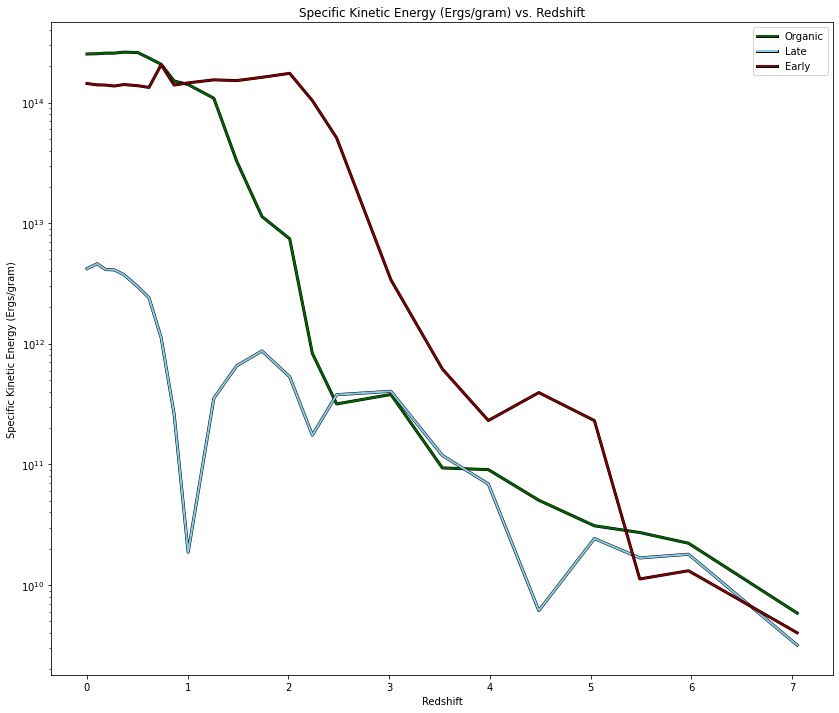

In [26]:
import os
from os import listdir
from mpl_toolkits import mplot3d
import re
import pandas as pd    
from os import listdir #path.join
import h5py
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from matplotlib.ticker import MaxNLocator
from cycler import cycler
import matplotlib.patheffects as mpe

outline=mpe.withStroke(linewidth=3, foreground='black')

# Set the default color cycle
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["darkgreen", "skyblue", "maroon"])

axisScale = 0.03
datasets = ['Organic', 'gm_late', 'gm_early']

for dataset in datasets:
    print('-----------------------------------------')
    print(dataset)
    print('-----------------------------------------')
    
    files = listdir('C:\\Users\\katha\\GalaxyMorphology\\' + dataset)
    os.path.join("/C:", "Users","katha","GalaxyMorphology", dataset)

    count = 0

    redshift = np.array(range(24), dtype = float)
    EKin = np.array(range(24), dtype = float)
    SpecEKin = np.array(range(24) , dtype = float)


  
    for file in files:

        #file = 'star_particles_015_z002p012.hdf5'
        
        # get redshift from the filename
        m = re.search('(z[0-9])\w+', file)
        s = m.group(0).replace('z', '')
        s = s.replace('p', '.')
        redshift[count] = float(s)
    
        
        # load data for a particular galaxy at a particular redshift
        f = h5py.File('C:\\Users\\katha\\GalaxyMorphology\\' + dataset + '/' + file,'r')

        # extract data from the file
        ds_c = f['Coordinates']   #Units are Mpc
        ds_v = f['Velocity']    # Units are km/s                
        ds_m = f['Mass'] # Units are solar masses
        
        # Calculate the maginitude of the velocity vector
        import numpy as np
        #vel = np.array(ds_v[0:1])
        vel = np.linalg.norm(ds_v, axis=1)
        #print(vel)
             
        
        # Calculate Kinetic Energy
        EKin[count] = np.sum((0.5)*(np.array(ds_m))*((vel)**2))
        #print(ds_m)
                
        # Calculate Specific Kinetic Energy
        SpecEKin[count] =np.sum((0.5)*((vel)**2))
        #print(ds_m)
        
        # UNIT CONVERSIONS
            # Unit is originally km/solar masse/second
            # ergs = cm grams per second
            # 1 Solar Mass = 1.9891x10**33 grams
            # 1km = 100,000 cm = 1000 m
            # (1.9891x10^33)*(100,000)) = 1.9891 × 10^29
            # EKinErg=(EKin*(1.9891*(10**28)))
            # SpecEKin = units km/s
            # SpecEKinErg = (SpecEKin*100000)) = cm/s
            # 1 Erg = 10^7 Joules
            # EKinJ = EKinErg * 10^7
            # SpecEKinJ = SpecEKinErg * 10^7
            


                     
        count = count + 1
        
    
        EKinErg = (EKin*(1.9891*(10**29)))
        SpecEKinErg = (SpecEKin*(100000))
        EKinJ = (EKinErg * (10**7))
        SpecEKinJ = (SpecEKinErg * (10**7))

        #plt.figure(figsize = (14,14.39))
        #plt.suptitle(('Specific Kinetic Energy (Ergs/g)' + dataset + ' ' + file), y=0.9)
        
        
        #plt.legend()
        
        #gs = gridspec.GridSpec(2,2)
        #gs.update(wspace=0, hspace=0)
        
            # Plot specific kitnetic energy (Ergs)
            
    plt.plot(redshift, SpecEKinErg, linewidth=2, path_effects=[outline])
    #plt.plot(prop_cycle=(cycler('color', ['mediumseagreen', 'red', 'b'])))
    plt.title('Specific Kinetic Energy (Ergs/gram) vs. Redshift')
    plt.xlabel('Redshift')
    plt.ylabel('Specific Kinetic Energy (Ergs/gram)')
    #plt.ticklabel_format(axis='y', style='sci', useMathText=True)
    plt.rcParams["figure.figsize"] = (14,12)
    plt.semilogy()
    plt.legend(['Organic','Late','Early'])
    #plt.savefig('C:\\Users\\katha\\GalaxyMorphology\\EKin\\' + dataset + '\\SpecEKinErgplot' + '.png', dpi=300)
plt.show()

        